## *Generating iot Schema from textual description*

-> In this code i do 2 concepts the first one entities extraction from unstructured data and the second is the ner tagging concept .

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ner dataset.txt to ner dataset.txt


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iot datafinal.csv to iot datafinal.csv


-> Import and install all the important libraries 

In [ ]:
import pandas as pd
import spacy
from spacy.matcher import PhraseMatcher
from spacy import displacy
from spacy.tokens import Span
from IPython.display import display, HTML
import re # 're' module for regular expressions
#!pip install spacy

In [ ]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('iot comp.csv')

In [ ]:
df

,Cable Assemblies,Control Systems,Connectors,Wireless,Electromechanical,Sensors,Drone,Electronic Components,Raspberry Pi,Development Boards,Device,Networking,Actuator,Environmental Monitoring,Protocols,Storage Components,HAT
0,Barrel - Audio Cables,Controllers - Accessories,Backplane Connectors,Wi-Fi,Audio,Sensor Kits,Drone Frames,LEDs,Boards Raspberry Pi,BBC Micro:Bit,Smart Bulb,IoT Gateway,Servo Motor,Air Quality Sensor,CoAP (Constrained Application Protocol),MicroSD Cards,Sense HAT
1,Barrel - Power Cables,Controllers - Cable Assemblies,Banana Connectors,Bluetooth,Fans,Distance Sensors,Lipo Batteries,Resistors,Raspberry Pi Kits,Beagle Bone,Smart Lock,Router,Stepper Motor,Water Quality Sensor,LWM2M (Lightweight Machine-to-Machine),Standard MicroSD Card,Grove Base Hat
2,Between Series Adapter Cables,"Controllers - Liquid, Level",Barrel,RFID,Industrial Automation and Controls,Temperature Sensor,Drone Remotes,Oscillators,Displays Raspberry Pi,Witty Fox,Smart Security Camera,IoT Bridge,Solenoid Valve,Soil Moisture Sensor,TR-069,High-Speed MicroSD Card,Robot HAT
3,Circular Cable Assemblies,Controllers - Machine Safety,Between Series Adapters,LoRa,"Motors, Solenoids, Driver",Gas Sensor,Drone Motors,Diodes,Keyboards & Mouse,M5Stack,Smart Plug,Switches,Pneumatic Cylinder,Weather Station,OMA-DM (Open Mobile Alliance Device Management),MicroSD Card with Large Capacity,IoT HATs
4,Coaxial Cables (RF),Controllers - PLC Modules,Blade Type Power Connectors,Zigbee,Relays,pH sensors,Drone Controllers,Potentiometer,Raspberry Pi Power Supply,STM Boards,Fitness Tracker,IoT SIM cards,Linear Actuator,Radiation Detector,MQTT (Message Queue Telemetry Transport),USB Flash Drives,PoE HAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,NaN,NaN,NaN,NaN,NaN,RFID Systems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,Smart Energy Meters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,NaN,NaN,NaN,NaN,NaN,Voltage Sensors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,NaN,NaN,NaN,NaN,NaN,Environmental Monitoring Stations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,Cable Assemblies,Control Systems,Connectors,Wireless,Electromechanical,Sensors,Drone,Electronic Components,Raspberry Pi,Development Boards,Device,Networking,Actuator,Environmental Monitoring,Protocols,Storage Components,HAT
0,Barrel - Audio Cables,Controllers - Accessories,Backplane Connectors,Wi-Fi,Audio,Sensor Kits,Drone Frames,LEDs,Boards Raspberry Pi,BBC Micro:Bit,Smart Bulb,IoT Gateway,Servo Motor,Air Quality Sensor,CoAP (Constrained Application Protocol),MicroSD Cards,Sense HAT
1,Barrel - Power Cables,Controllers - Cable Assemblies,Banana Connectors,Bluetooth,Fans,Distance Sensors,Lipo Batteries,Resistors,Raspberry Pi Kits,Beagle Bone,Smart Lock,Router,Stepper Motor,Water Quality Sensor,LWM2M (Lightweight Machine-to-Machine),Standard MicroSD Card,Grove Base Hat
2,Between Series Adapter Cables,"Controllers - Liquid, Level",Barrel,RFID,Industrial Automation and Controls,Temperature Sensor,Drone Remotes,Oscillators,Displays Raspberry Pi,Witty Fox,Smart Security Camera,IoT Bridge,Solenoid Valve,Soil Moisture Sensor,TR-069,High-Speed MicroSD Card,Robot HAT
3,Circular Cable Assemblies,Controllers - Machine Safety,Between Series Adapters,LoRa,"Motors, Solenoids, Driver",Gas Sensor,Drone Motors,Diodes,Keyboards & Mouse,M5Stack,Smart Plug,Switches,Pneumatic Cylinder,Weather Station,OMA-DM (Open Mobile Alliance Device Management),MicroSD Card with Large Capacity,IoT HATs
4,Coaxial Cables (RF),Controllers - PLC Modules,Blade Type Power Connectors,Zigbee,Relays,pH sensors,Drone Controllers,Potentiometer,Raspberry Pi Power Supply,STM Boards,Fitness Tracker,IoT SIM cards,Linear Actuator,Radiation Detector,MQTT (Message Queue Telemetry Transport),USB Flash Drives,PoE HAT


In [ ]:
df.columns

Index(['Cable Assemblies', 'Control Systems', ' Connectors', 'Wireless',
       'Electromechanical', ' Sensors', 'Drone', 'Electronic Components',
       'Raspberry Pi', 'Development Boards', 'Device', 'Networking',
       'Actuator', 'Environmental Monitoring', 'Protocols',
       'Storage Components', 'HAT'],
      dtype='object')

*   Restructure the dataset format for iot component to melted format and name it as "melted_df"
*   Convert the name of all columns to one column that contain "*Category*" name and all the data that exist in the rows change it to "*Component*"column


In [ ]:
# Use melt to reshape the data
melted_df = pd.melt(df, var_name='Category', value_name='Component')

# Display the result
print(melted_df.head())

           Category                      Component
0  Cable Assemblies          Barrel - Audio Cables
1  Cable Assemblies          Barrel - Power Cables
2  Cable Assemblies  Between Series Adapter Cables
3  Cable Assemblies      Circular Cable Assemblies
4  Cable Assemblies            Coaxial Cables (RF)


In [ ]:
melted_df

,Category,Component
0,Cable Assemblies,Barrel - Audio Cables
1,Cable Assemblies,Barrel - Power Cables
2,Cable Assemblies,Between Series Adapter Cables
3,Cable Assemblies,Circular Cable Assemblies
4,Cable Assemblies,Coaxial Cables (RF)
...,...,...
4381,HAT,NaN
4382,HAT,NaN
4383,HAT,NaN
4384,HAT,NaN


In [ ]:
# Check how many NaN values exist in the 'Component' column
nan_count = melted_df['Component'].isna().sum()

# Display the count of NaN values
print(f'There are {nan_count} NaN values in the Component column.')

There are 3115 NaN values in the Component column.


In [ ]:
melted_df.to_csv('melted_data.csv', index=False)

-> Data Pre-processing

In [ ]:
import spacy
# upload the unstructured data text that contain textual description
with open('ner dataset.txt', 'r') as file:
    text = file.read()
# Preprocess the text using spaCy
doc = nlp(text)

In [ ]:
# Function to analyze text using spaCy
# Extract tokens and sentence from the document
def analyze_text(text, nlp):
    sentences = [sent.text for sent in doc.sents]  # Extract each sentence
    num_sentences = len(sentences)  # Count the number of sentences
    tokens = [token.text for token in doc]  # Tokenization
    num_tokens = len(tokens)  # Count tokens
    num_stopwords = sum(1 for token in doc if token.is_stop)  # Count stopwords
    return num_sentences, sentences,num_tokens, num_stopwords, tokens

In [ ]:
# Analyze text before preprocessing
num_sentences, sentences,num_tokens_before, num_stopwords_before, tokens_before = analyze_text(text, nlp)
# Print out the results
print(f"Before preprocessing:")
print(f'Number of sentences: {num_sentences}')
print(f"Total number of tokens: {num_tokens_before}")
print(f"Total number of stopwords: {num_stopwords_before}")
print(f'Sentences: {sentences}')

Before preprocessing:
Number of sentences: 593
Total number of tokens: 13184
Total number of stopwords: 3208
Sentences: ['The smart home system consists of a central hub that connects to various IoT devices, including a smart thermostat, a smart lighting system, and a security camera. \n', 'The thermostat monitors temperature and humidity levels in the house, automatically adjusting the heating or cooling based on user preferences. \n', 'A smart city deploys traffic flow sensors, environmental monitoring stations, and smart traffic lights.', 'The traffic flow sensors track vehicle movement, helping to optimize traffic light timing.', 'Environmental monitoring stations use humidity sensors and air quality sensors to track pollution levels.', 'All devices are connected through a 5G network for fast, real-time data transmission.\n', 'The lighting system can be controlled remotely via a mobile app and can turn on/off lights based on occupancy detection. \n', 'In a smart warehouse, conveyor

-> Text Prepocessing step and kept the the dot'.' that use it for training model with "sentence_id"

In [ ]:
# Create a PhraseMatcher instance
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
# Function to normalize and prepare patterns for PhraseMatcher
def prepare_patterns(melted_df):
    patterns = []
    for category in melted_df['Category'].unique():
        # Filter components under each category and remove missing values
        components = melted_df[melted_df['Category'] == category]['Component'].dropna()
        for component in components:
            component = component.strip().lower()
            patterns.append((category, nlp(component)))  # 'category' represents the entity type
    return patterns

# Add patterns to the matcher
patterns = prepare_patterns(melted_df)
for entity_type, doc in patterns:
    matcher.add(entity_type, [doc])

# Data Cleaning and Preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
     # Only removes non-alphabetic, non-space, and non-dot characters
    text = re.sub(r'[^a-z\s\.]', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Preprocess the text
cleaned_text = preprocess_text(text)

# Process the cleaned text with spaCy
doc = nlp(cleaned_text)

-> this doc contain a new version of the text the clean one after preprocessing so we can call it doc_clean

In [ ]:
# Tokenization: Extract tokens from the document
tokens = [token.text for token in doc]
print(f'Tokens: {tokens}')
print(f'Total number of tokens: {len(tokens)}')
print(f'Sentences: {sentences}')

Tokens: ['the', 'smart', 'home', 'system', 'consists', 'of', 'a', 'central', 'hub', 'that', 'connects', 'to', 'various', 'iot', 'devices', 'including', 'a', 'smart', 'thermostat', 'a', 'smart', 'lighting', 'system', 'and', 'a', 'security', 'camera', '.', 'the', 'thermostat', 'monitors', 'temperature', 'and', 'humidity', 'levels', 'in', 'the', 'house', 'automatically', 'adjusting', 'the', 'heating', 'or', 'cooling', 'based', 'on', 'user', 'preferences', '.', 'a', 'smart', 'city', 'deploys', 'traffic', 'flow', 'sensors', 'environmental', 'monitoring', 'stations', 'and', 'smart', 'traffic', 'lights', '.', 'the', 'traffic', 'flow', 'sensors', 'track', 'vehicle', 'movement', 'helping', 'to', 'optimize', 'traffic', 'light', 'timing', '.', 'environmental', 'monitoring', 'stations', 'use', 'humidity', 'sensors', 'and', 'air', 'quality', 'sensors', 'to', 'track', 'pollution', 'levels', '.', 'all', 'devices', 'are', 'connected', 'through', 'a', 'g', 'network', 'for', 'fast', 'realtime', 'data', 

In [ ]:
num_sentences_after, sentences_after, num_tokens_after, num_stopwords_after, tokens_after = analyze_text(cleaned_text, nlp)
print(f"\nAfter preprocessing:")
print(f"Number of sentences: {num_sentences_after}")
print(f"Total number of tokens: {num_tokens_after}")
print(f"Total number of stopwords: {num_stopwords_after}")
print(f"Tokens: {tokens_after}")


After preprocessing:
Number of sentences: 593
Total number of tokens: 11316
Total number of stopwords: 3169
Tokens: ['the', 'smart', 'home', 'system', 'consists', 'of', 'a', 'central', 'hub', 'that', 'connects', 'to', 'various', 'iot', 'devices', 'including', 'a', 'smart', 'thermostat', 'a', 'smart', 'lighting', 'system', 'and', 'a', 'security', 'camera', '.', 'the', 'thermostat', 'monitors', 'temperature', 'and', 'humidity', 'levels', 'in', 'the', 'house', 'automatically', 'adjusting', 'the', 'heating', 'or', 'cooling', 'based', 'on', 'user', 'preferences', '.', 'a', 'smart', 'city', 'deploys', 'traffic', 'flow', 'sensors', 'environmental', 'monitoring', 'stations', 'and', 'smart', 'traffic', 'lights', '.', 'the', 'traffic', 'flow', 'sensors', 'track', 'vehicle', 'movement', 'helping', 'to', 'optimize', 'traffic', 'light', 'timing', '.', 'environmental', 'monitoring', 'stations', 'use', 'humidity', 'sensors', 'and', 'air', 'quality', 'sensors', 'to', 'track', 'pollution', 'levels', '

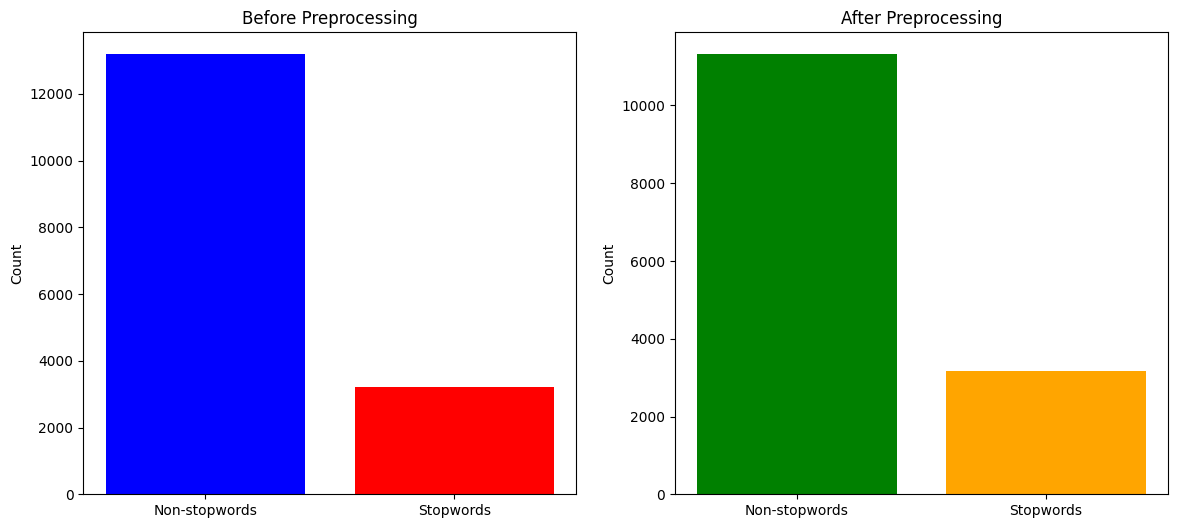

In [ ]:
import matplotlib.pyplot as plt
# Plot the results for both before and after preprocessing

def plot_metrics(num_tokens_before, num_stopwords_before, num_tokens_after, num_stopwords_after):
    # Metrics labels
    labels = ['Non-stopwords', 'Stopwords']

    # Values before and after preprocessing
    before_counts = [num_tokens_before, num_stopwords_before]
    after_counts = [num_tokens_after, num_stopwords_after]

    # Create two subplots: one for before and one for after preprocessing
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Plot before preprocessing
    ax[0].bar(labels, before_counts, color=['blue', 'red'])
    ax[0].set_title('Before Preprocessing')
    ax[0].set_ylabel('Count')

    # Plot after preprocessing
    ax[1].bar(labels, after_counts, color=['green', 'orange'])
    ax[1].set_title('After Preprocessing')
    ax[1].set_ylabel('Count')

    # Display the plots
    plt.show()

# Call the function to plot the metrics
plot_metrics(num_tokens_before, num_stopwords_before, num_tokens_after, num_stopwords_after)

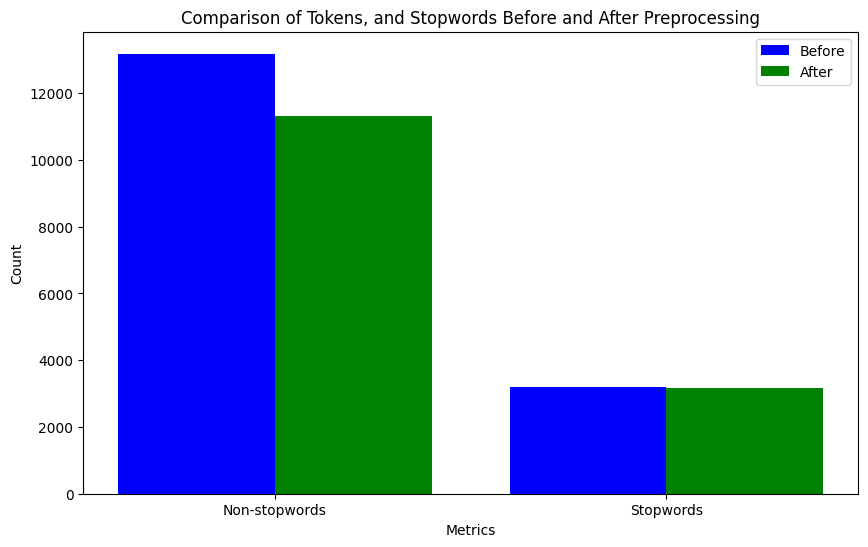

In [ ]:
import matplotlib.pyplot as plt
# Create a bar plot to compare the counts before and after preprocessing
labels = ['Non-stopwords', 'Stopwords']
before_counts = [num_tokens_before, num_stopwords_before]
after_counts = [num_tokens_after, num_stopwords_after]

x = range(len(labels))  # Create an index for each group of bars

plt.figure(figsize=(10, 6))
plt.bar(x, before_counts, width=0.4, label='Before', color='blue', align='center')
plt.bar([i + 0.4 for i in x], after_counts, width=0.4, label='After', color='green', align='center')

plt.xlabel('Metrics')
plt.ylabel('Count')
plt.title('Comparison of Tokens, and Stopwords Before and After Preprocessing')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()

# Display the plot
plt.show()


In [ ]:
# Abbreviation regex patterns (customize as needed)
abbreviation_regex = r'\b[A-Z]{2,3}\b'  # Abbreviations with only letters
abbreviation_with_digits_regex = r'[A-Z]{1,4}\d+'  # Abbreviations with 1-4 letters and digits

# Function to identify abbreviations in the document using regex
def find_abbreviations(text):
    abbreviations = re.findall(abbreviation_regex, text)  # Find abbreviations with letters only
    abbreviations_with_digits = re.findall(abbreviation_with_digits_regex, text)  # Find abbreviations with digits
    all_abbreviations = abbreviations + abbreviations_with_digits  # Combine both lists
    return all_abbreviations
# Find all abbreviations
abbreviations = find_abbreviations(text)
print(f"Abbreviations found: {abbreviations}")
print(f"Number of abbreviations: {len(abbreviations)}")

Abbreviations found: ['GPS', 'GPS', 'GPS', 'GPS', 'GPS', 'GPS', 'USB', 'GPS', 'ECG', 'GPS', 'GPS', 'OBD', 'II', 'PID', 'DIY', 'AI', 'LED', 'UV', 'TLS', 'VPN', 'LTE', 'HAT', 'GPS', 'PCB', 'USB', 'RF', 'HC', 'BLE', 'NFC', 'NFC', 'NEO', 'GPS', 'NEO', 'GPS', 'IR', 'IR', 'NAS', 'SD', 'HAT', 'GSM', 'HAT', 'SMS', 'HAT', 'HAT', 'IMU', 'HAT', 'DAC', 'HAT', 'LED', 'HAT', 'CAN', 'HAT', 'CAN', 'NFC', 'HAT', 'NFC', 'NFC', 'GPS', 'NB', 'BLE', 'CAN', 'NFC', 'LTE', 'SFP', 'PID', 'DIY', 'NUC', 'PC', 'PIR', 'GPS', 'HD', 'PLC', 'DCS', 'BMS', 'CNC', 'USB', 'SSD', 'LED', 'SSD', 'NAS', 'USB', 'PLC', 'DCS', 'BMS', 'CNC', 'USB', 'GPS', 'LTE', 'GPS', 'LTE', 'GPS', 'GPS', 'GPS', 'GPS', 'PLC', 'GPS', 'GPS', 'GPS', 'CO', 'ESP32', 'CO2', 'M12', 'RJ45', 'ESP32', 'SX1278', 'RFM95', 'PN532', 'RC522', 'NRF905', 'SX1231', 'M8', 'TSOP38238', 'GP2', 'Y0', 'A21', 'YK0', 'MFRC522', 'PN532', 'TSL2561', 'BMP280', 'ESP8266', 'ESP32', 'STM32', 'CO2', 'M12', 'ESP8266', 'STM32', 'Z2', 'M12', 'CO2', 'PM2']
Number of abbreviations

In [ ]:
def filter_abbreviations(doc, matches):
    filtered_matches = []
    for match_id, start, end in matches:
        matched_text = doc[start:end].text

        # Check if the match is an abbreviation by matching against regex patterns
        is_abbreviation = re.match(abbreviation_regex, matched_text) or re.match(abbreviation_with_digits_regex, matched_text)

        # Only add matches that are valid abbreviations or proper entities
        if is_abbreviation:
            filtered_matches.append((match_id, start, end))  # Valid abbreviation
        else:
            filtered_matches.append((match_id, start, end))  # Add other valid entities
    return filtered_matches

# Function to normalize and prepare patterns from melted_df for PhraseMatcher
def prepare_patterns(melted_df):
    patterns = []
    for category in melted_df['Category'].unique():
        # Filter components under each category and remove missing values
        components = melted_df[melted_df['Category'] == category]['Component'].dropna()
        for component in components:
            component = component.strip().lower()  # Normalize component names
            patterns.append((category, nlp(component)))  # 'category' represents the entity type
    return patterns
matches = matcher(doc)
patterns = prepare_patterns(melted_df)
for entity_type, pattern in patterns:
    matcher.add(entity_type, [pattern])
# Filter the matches to include only valid abbreviations and entities
filtered_matches = filter_abbreviations(doc, matches)

# Display the results
for match_id, start, end in filtered_matches:
    matched_text = doc[start:end].text
    entity_type = nlp.vocab.strings[match_id]  # Get the corresponding entity (category name)
    print(f"Entity Type: {entity_type}, Entity Name: {matched_text}")

Entity Type: Device, Entity Name: central hub
Entity Type: Device, Entity Name: smart thermostat
Entity Type: Device, Entity Name: smart lighting system
Entity Type: Device, Entity Name: lighting system
Entity Type:  Sensors, Entity Name: traffic flow sensors
Entity Type:  Sensors, Entity Name: flow sensors
Entity Type:  Sensors, Entity Name: environmental monitoring stations
Entity Type: Actuator, Entity Name: smart traffic lights
Entity Type:  Sensors, Entity Name: traffic flow sensors
Entity Type:  Sensors, Entity Name: flow sensors
Entity Type:  Sensors, Entity Name: environmental monitoring stations
Entity Type:  Sensors, Entity Name: humidity sensors
Entity Type:  Sensors, Entity Name: air quality sensors
Entity Type: Device, Entity Name: lighting system
Entity Type: Actuator, Entity Name: conveyor belt actuators
Entity Type: Wireless, Entity Name: rfid
Entity Type: Wireless, Entity Name: rfid
Entity Type:  Sensors, Entity Name: humidity sensors
Entity Type:  Sensors, Entity Name

In [ ]:
# Dictionary of colors for entities
color_dict = {
    'Cable Assemblies': 'salmon',
    'Control Systems': 'red',
    'Connectors': 'blue',
    'Wireless': 'green',
    'Electromechanical': 'purple',
    'Sensors': 'silver',
    'Drone': 'pink',
    'Electronic Components': 'LightGreen',
    'Raspberry Pi': 'lavender',
    'Development Boards': 'aqua',
    'Device': 'Orange',
    'Networking': 'Navy',
    'Actuator': 'Violet',
    'Environmental Monitoring': 'tomato',
    'Protocols': 'wheat',
    'Storage Components': 'lime',
    'HAT': 'yellow'
}

# Create a colored version of the text
colored_text = cleaned_text
for match_id, start, end in matches:
    matched_text = doc[start:end].text
    entity_type = nlp.vocab.strings[match_id]
    color = color_dict.get(entity_type, 'black')  # Default color if type not found
    colored_text = colored_text.replace(matched_text, f"<span style='color: {color}; font-size: large; font-style: italic;'>{matched_text}</span>")

# Display the colored text
display(HTML(colored_text))

In [ ]:
import matplotlib.patches as mpatches

# Create a figure for the text with colored entity highlights
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.axis('off')  # Turn off the axis

# Display each token with its corresponding color
y_position = 1.0
for match_id, start, end in matches:
    matched_text = doc[start:end].text
    entity_type = nlp.vocab.strings[match_id]
    color = color_dict.get(entity_type, 'black')

    plt.text(0.1, y_position, matched_text, fontsize=12, color=color, ha='left', va='center', fontstyle='italic')
    y_position -= 0.05

# Create legend for entity colors
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in color_dict.items()]
plt.legend(handles=legend_handles, loc='upper right')

plt.show()

In [ ]:
spans = [doc[start:end] for match_id, start, end in matches]
for span in spans:
    print(f"Span: {span.text}, Label: {span.label_}")


Span: central hub, Label: 
Span: smart thermostat, Label: 
Span: smart lighting system, Label: 
Span: lighting system, Label: 
Span: traffic flow sensors, Label: 
Span: flow sensors, Label: 
Span: environmental monitoring stations, Label: 
Span: smart traffic lights, Label: 
Span: traffic flow sensors, Label: 
Span: flow sensors, Label: 
Span: environmental monitoring stations, Label: 
Span: humidity sensors, Label: 
Span: air quality sensors, Label: 
Span: lighting system, Label: 
Span: conveyor belt actuators, Label: 
Span: rfid, Label: 
Span: rfid, Label: 
Span: humidity sensors, Label: 
Span: air quality sensors, Label: 
Span: biomedical sensors, Label: 
Span: remote patient monitoring systems, Label: 
Span: biomedical sensors, Label: 
Span: bluetooth, Label: 
Span: motion sensors, Label: 
Span: pressure sensors, Label: 
Span: flow sensors, Label: 
Span: hydraulic actuators, Label: 
Span: hydraulic actuators, Label: 
Span: pressure sensors, Label: 
Span: flow sensors, Label: 
Span:

In [ ]:
span = Span(doc, start, end, label=nlp.vocab.strings[match_id].strip())
tokens = []
iob_tags = []
entity_types = []
attention_masks = []

# Create a list to store spans
spans = []

# Add spans based on the matches
for match_id, start, end in matches:
    span = Span(doc, start, end, label=nlp.vocab.strings[match_id].strip())
    spans.append(span)

# Handle overlapping spans
spans = spacy.util.filter_spans(spans)

# Debugging: Print out the filtered spans to verify
print("Filtered Spans and Labels:")
for span in spans:
    print(f"Span: {span.text}, Label: {span.label_}")

# Define a mapping for entity types to numbers
entity_type_mapping = {
    'Cable Assemblies': 1,
    'Control Systems': 2,
    'Connectors': 3,
    'Wireless': 4,
    'Electromechanical': 5,
    'Sensors': 6,
    'Drone': 7,
    'Electronic Components': 8,
    'Raspberry Pi': 9,
    'Development Boards': 10,
    'Device': 11,
    'Networking': 12,
    'Actuator': 13,
    'Environmental Monitoring': 14,
    'Protocols': 15,
    'Storage Components': 16,
    'HAT': 17
}
# Token-level IOB tagging using the filtered spans
for token in doc:
    is_matched = False
    for span in spans:
        # Debugging: Print token and span information
        print(f"Token: {token.text}, Span: {span.text}, Span Label: {span.label_}, Token Index: {token.i}, Span Start: {span.start}, Span End: {span.end}")

        # Ensure that the token index falls within the span range
        if span.start <= token.i < span.end:
            entity_type = span.label_
            iob_tag = 'B' if token.i == span.start else 'I'
            attention_mask = 1
            entity_type_number = entity_type_mapping.get(entity_type.strip(), 0)

            # Debugging: Print matched entity and IOB tag
            print(f"Matched Entity Type: {entity_type}, IOB Tag: {iob_tag}, Token: {token.text}")

            iob_tags.append(iob_tag)
            entity_types.append(entity_type_number)
            attention_masks.append(attention_mask)
            is_matched = True
            break

    if not is_matched:
        # For tokens that are not part of any entity
        iob_tags.append('O')
        entity_types.append(0)
        attention_masks.append(0)

    tokens.append(token.text)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Token: patient, Span: iot bridge, Span Label: Networking, Token Index: 10828, Span Start: 4007, Span End: 4009
Token: patient, Span: zigbee, Span Label: Wireless, Token Index: 10828, Span Start: 4021, Span End: 4022
Token: patient, Span: smart lighting system, Span Label: Device, Token Index: 10828, Span Start: 4028, Span End: 4031
Token: patient, Span: weather station, Span Label: Environmental Monitoring, Token Index: 10828, Span Start: 4054, Span End: 4056
Token: patient, Span: arduino development board, Span Label: Development Boards, Token Index: 10828, Span Start: 4082, Span End: 4085
Token: patient, Span: beaglebone black, Span Label: Development Boards, Token Index: 10828, Span Start: 4096, Span End: 4098
Token: patient, Span: energy monitoring system, Span Label: Sensors, Token Index: 10828, Span Start: 4106, Span End: 4109
Token: patient, Span: bluetooth, Span Label: Wireless, Token Index: 10828, Sp

In [ ]:
# Create the final DataFrame
result_df = pd.DataFrame({
    'Token': tokens,
    'IOB': iob_tags,
    'Entity_Type_Number': entity_types,
    'Attention_Mask': attention_masks
})

print(result_df)

# Save the result to a CSV file
result_df.to_csv('Nertagging.csv', index=False)

          Token IOB  Entity_Type_Number  Attention_Mask
0           the   O                   0               0
1         smart   O                   0               0
2          home   O                   0               0
3        system   O                   0               0
4      consists   O                   0               0
...         ...  ..                 ...             ...
11311       the   O                   0               0
11312      time   O                   0               0
11313        of   O                   0               0
11314       day   O                   0               0
11315         .   O                   0               0

[11316 rows x 4 columns]
